# <center>Model Building</center>

In this section, we'll build a model that classify between the shapes.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../newdata/csv/data.csv')
df.head()

,no_paths,no_points,width,height,elongation,length,area,roundness,drawing
0,5,883,339,243,1.393443,621.724587,21566.0,0.701106,car
1,4,596,321,227,1.412281,580.020937,15616.5,0.583319,fish
2,8,571,287,272,1.054945,579.209087,23580.5,0.883267,house
3,3,575,263,335,1.272727,703.863135,32369.5,0.821050,tree
4,5,586,283,263,1.075758,574.167315,21621.0,0.824155,bicycle


In [4]:
df.tail()

,no_paths,no_points,width,height,elongation,length,area,roundness,drawing
5502,3,572,321,366,1.139752,892.049033,54646.0,0.862960,tree
5503,10,703,310,324,1.045016,565.407418,17501.5,0.687958,bicycle
5504,11,613,370,252,1.466403,642.163428,14504.0,0.441984,guitar
5505,8,990,178,301,1.687151,450.218074,4680.0,0.290142,pencil
5506,1,124,299,264,1.132075,636.952912,31336.5,0.970612,clock


In [5]:
df['drawing'].value_counts()

tree       694
bicycle    692
guitar     692
clock      690
car        689
house      689
fish       686
pencil     675
Name: drawing, dtype: int64

<Axes: >

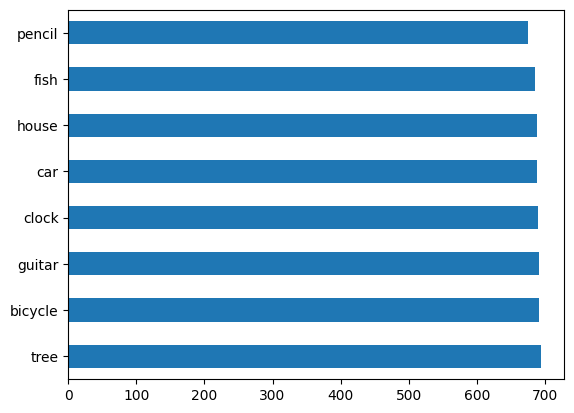

In [6]:
df['drawing'].value_counts().plot(kind='barh')

#### Label Encoding
Transforming categorical data into a numerical ones

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

In [8]:
labels = label_encode.fit_transform(df.drawing)
df['drawing']=labels

In [9]:
df.head()

,no_paths,no_points,width,height,elongation,length,area,roundness,drawing
0,5,883,339,243,1.393443,621.724587,21566.0,0.701106,1
1,4,596,321,227,1.412281,580.020937,15616.5,0.583319,3
2,8,571,287,272,1.054945,579.209087,23580.5,0.883267,5
3,3,575,263,335,1.272727,703.863135,32369.5,0.821050,7
4,5,586,283,263,1.075758,574.167315,21621.0,0.824155,0


Let's see each number to which categorical data was associated

In [10]:
label_mapping = dict(zip(label_encode.classes_, label_encode.transform(label_encode.classes_)))
label_mapping

{'bicycle': 0,
 'car': 1,
 'clock': 2,
 'fish': 3,
 'guitar': 4,
 'house': 5,
 'pencil': 6,
 'tree': 7}

#### Data splitting & Standardization
- Splitting data

In [11]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X.head()

,no_paths,no_points,width,height,elongation,length,area,roundness
0,5,883,339,243,1.393443,621.724587,21566.0,0.701106
1,4,596,321,227,1.412281,580.020937,15616.5,0.583319
2,8,571,287,272,1.054945,579.209087,23580.5,0.883267
3,3,575,263,335,1.272727,703.863135,32369.5,0.821050
4,5,586,283,263,1.075758,574.167315,21621.0,0.824155


In [13]:
y

0       1
1       3
2       5
3       7
4       0
       ..
5502    7
5503    0
5504    4
5505    6
5506    2
Name: drawing, Length: 5507, dtype: int32

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2024)

In [15]:
X_train

,no_paths,no_points,width,height,elongation,length,area,roundness
1680,7,319,318,216,1.470046,528.687555,16995.5,0.764092
2467,6,743,300,339,1.129568,718.688165,15180.5,0.369330
838,7,328,290,283,1.024648,693.592418,37161.0,0.970708
2717,15,504,368,164,2.236364,498.340274,9888.0,0.500341
1855,3,141,223,229,1.026786,347.794510,7937.5,0.824609
...,...,...,...,...,...,...,...,...
183,17,885,359,321,1.118012,804.836099,36891.5,0.715684
2494,3,138,280,195,1.433673,554.283253,21006.5,0.859211
2688,7,481,301,335,1.112583,628.193964,22994.5,0.732228
2656,9,378,316,217,1.454128,566.505897,18900.5,0.740073


- Data Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.38273665, -0.54292468,  0.11905301, ..., -0.99799164,
        -0.80645547,  0.1146172 ],
       [-0.45807312,  0.06842478, -0.23261086, ..., -0.02224692,
        -0.8916866 , -2.13293701],
       [-0.38273665, -0.52994793, -0.42797969, ..., -0.15112568,
         0.14050231,  1.2909741 ],
       ...,
       [-0.38273665, -0.30934305, -0.21307398, ..., -0.48697826,
        -0.52474662, -0.06679874],
       [-0.2320637 , -0.45785483,  0.07997925, ..., -0.80377623,
        -0.716998  , -0.02213615],
       [-0.68408254, -0.15506382,  0.82238077, ...,  0.09168655,
        -0.39960009, -0.89109375]])

### Model Training
- K-Nearest Classifier

We'll be using `GridSearchCV` : It's a method that help us to try multiple k values and hyperparameters to choose the best suited model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid = {'n_neighbors': np. arange (1, 20),
              'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5) 
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [26]:
print(f"{grid.best_score_=}  {grid.best_params_=}")

grid.best_score_=0.5897843359818388  grid.best_params_={'metric': 'manhattan', 'n_neighbors': 15}


In [27]:
nmodel = grid.best_estimator_
nmodel.fit(X_train_scaled,y_train)
nmodel.score(X_test_scaled,y_test)

0.5898366606170599

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = nmodel.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

Mean Squared Error: 4.219600725952813
Mean Absolute Error: 1.1560798548094373
R-squared Score: 0.22202033316956826


So this KNN model is not good at all.

* Other models:

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

for name, model in models:
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"The model : {name}")

    print(f'Accuracy: {accuracy}')

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared Score: {r2}')

    print("###################################################")

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model : Logistic Regression
Accuracy: 0.5862068965517241
Mean Squared Error: 4.481851179673321
Mean Absolute Error: 1.1950998185117967
R-squared Score: 0.17366847860741885
###################################################
The model : SVM
Accuracy: 0.6161524500907442
Mean Squared Error: 4.336660617059891
Mean Absolute Error: 1.1370235934664248
R-squared Score: 0.200437671444595
###################################################
The model : Decision Tree
Accuracy: 0.5190562613430127
Mean Squared Error: 5.608892921960073
Mean Absolute Error: 1.4419237749546279
R-squared Score: -0.034127380791160844
###################################################
The model : Random Forest
Accuracy: 0.6079854809437386
Mean Squared Error: 4.190562613430127
Mean Absolute Error: 1.1270417422867514
R-squared Score: 0.22737417173700358
###################################################


As we see the models aren't good enough, the best one (SVC) has an accuracy of 0.61(61%) which is not good enough.

### So, we'll try to use a deep learning approach to classify the shapes.	

### Previous Notebook : [Feature Extraction](Feature_Extraction.ipynb)
### Next Notebook : [Deep learning approach](../DL_approach/Data_processing.ipynb)